In [1]:
import torch
import torch.nn as nn
from  torchvision  import datasets,transforms
import torch.optim as optim
import torch.nn.functional as F

```python
batch_size = 100
cifar_train = datasets.CIFAR10(root = 'CIFAR_10',train = True,transform = transforms.Compose([
      transforms.Resize((32,32)),
      transforms.ToTensor()]),download = True)
train_loader = torch.utils.data.DataLoader(cifar_train,train = True,batch_size=batch_size,shuffle=True)

cifar_test = datasets.CIFAR10(root = 'CIFAR_10',train = False,transform = transforms.Compose([
         transforms.Resize((32,32)),
         transforms.Totensor()]),download = True)
test_loader = torch.utils.data.DataLoader(cifar_test,train = False,batch_size = batch_size,shuffle = True)
```

In [2]:
import pickle
import numpy as plt
def load(filename):

    with open(filename, 'rb') as fo:

        data = pickle.load(fo, encoding='latin1')

    return data
fil = 'E:\Download\DigitalImage\cifar-10-batches-py\data_batch_1'
batch_1 = load(fil)
print(batch_1['data'].shape)
print(batch_1.keys())

(10000, 3072)
dict_keys(['batch_label', 'labels', 'data', 'filenames'])


[[[159 150 153 ...  91  74  76]
  [142 146 155 ... 127 122  86]
  [109  99 105 ... 137 163  93]
  ...
  [244 240 241 ... 156 179 200]
  [246 243 243 ... 162 178 192]
  [246 243 244 ... 166 173 182]]

 [[102  91  95 ...  71  63  58]
  [ 75  72  76 ... 105 111  69]
  [ 67  58  59 ... 112 132  72]
  ...
  [129 123 122 ...  42  59  73]
  [133 128 127 ...  44  56  65]
  [139 133 132 ...  47  51  57]]

 [[101  95  97 ...  56  55  55]
  [ 68  66  65 ...  71  93  61]
  [ 75  60  52 ...  80 105  71]
  ...
  [ 70  65  65 ...  15  26  36]
  [ 74  72  70 ...  14  22  27]
  [ 82  78  77 ...  14  17  19]]]
[[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  

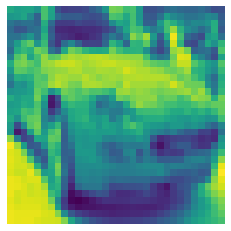

In [3]:
#数据查看
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
a = batch_1['data']
imgs = a[5, :].reshape([3, 32, 32])
print(imgs)
img = np.stack((imgs[0, :, :], imgs[1, :, :], imgs[2, :, :]), 2)
r = imgs[0, :, :]
g = imgs[1, :, :]
b = imgs[2, :, :]
print(img)
#print(img.shape)
#pic = Image.merge('RGB',(r,g,b))
plt.imshow(r)
plt.axis('off')
plt.show()


In [44]:
import pickle
import numpy as plt
def load(filename):

    with open(filename, 'rb') as fo:

        data = pickle.load(fo, encoding='latin1')

    return data
fil = 'E:\Download\DigitalImage\cifar-10-batches-py\data_batch_1'
batch_1 = load(fil)
print(batch_1['data'].shape)
print(batch_1.keys())

(10000, 3072)
dict_keys(['batch_label', 'labels', 'data', 'filenames'])


In [7]:
'''
transform = transforms.Compose([transforms.ToTensor()])
batch1 = []
#batch1.extend([1])
print(type(batch1))
print(batch1)
batch1.extend(batch_1['data'])
batch1.extend(batch_1['labels'])
#batch1 = np.array(batch1)
print(batch1[0].shape)
batch_1 = transform(batch1)
print(batch_1)
```


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-7-daf1fc5163f1>, line 14)

In [4]:
import torch
import torch.nn as nn
from  torchvision  import datasets,transforms
import torch.optim as optim
import torch.nn.functional as F
import pickle
import numpy as plt
# 数据加载预处理
#def load(filename):

#    with open(filename, 'rb') as fo:

 #       data = pickle.load(fo, encoding='latin1')
def load(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
fil_1 = 'E:\Download\DigitalImage\cifar-10-batches-py\data_batch_1'
fil_2 = 'E:\Download\DigitalImage\cifar-10-batches-py\data_batch_2'
fil_3 = 'E:\Download\DigitalImage\cifar-10-batches-py\data_batch_3'
fil_4 = 'E:\Download\DigitalImage\cifar-10-batches-py\data_batch_4'
fil_5 = 'E:\Download\DigitalImage\cifar-10-batches-py\data_batch_5'
fil_6 = 'E:\Download\DigitalImage\cifar-10-batches-py\\test_batch_1'

path = [fil_1,fil_2,fil_3,fil_4,fil_5,fil_6]
train_data = []
test_data = []
for i in range(len(path)):
    if i != len(path)-1:
        datas = load(path[i])
        #print(datas.keys())
        a = datas[b'data'].reshape(10000,3,32,32)
       # c = torch.from_numpy(a)
       # print(type(a))
        #print(a.shape)
        train_data.append((torch.FloatTensor(a),torch.LongTensor(datas[b'labels'])))
        print()
    else:
        datas = load(path[i])
        test_data = [(torch.FloatTensor(datas[b'data'].reshape(10000,3,32,32)),torch.LongTensor(datas[b'labels']))]
#train_batch_1 = load(fil_1)
#train_batch_2 = load(fil_2)
#train_batch_3 = load(fil_3)
#train_batch_4 = load(fil_4)
#train_batch_5 = load(fil_5)
#test_batch  =  load(fil_6)
#data_1 = (batch_1['data'].reshape(10000,3,32,32),batch_1['labels'])
#print(data_1.shape)
#data_1 = torch.tensor(data_1)
#print(data_1)
for data,label in train_data:
    print(data.shape)
    print(type(data))
print(test_data)






torch.Size([10000, 3, 32, 32])
<class 'torch.Tensor'>
torch.Size([10000, 3, 32, 32])
<class 'torch.Tensor'>
torch.Size([10000, 3, 32, 32])
<class 'torch.Tensor'>
torch.Size([10000, 3, 32, 32])
<class 'torch.Tensor'>
torch.Size([10000, 3, 32, 32])
<class 'torch.Tensor'>
[(tensor([[[[158., 159., 165.,  ..., 137., 126., 116.],
          [152., 151., 159.,  ..., 136., 125., 119.],
          [151., 151., 158.,  ..., 139., 130., 120.],
          ...,
          [ 68.,  42.,  31.,  ...,  38.,  13.,  40.],
          [ 61.,  49.,  35.,  ...,  26.,  29.,  20.],
          [ 54.,  56.,  45.,  ...,  24.,  34.,  21.]],

         [[112., 111., 116.,  ...,  95.,  91.,  85.],
          [112., 110., 114.,  ...,  95.,  91.,  88.],
          [110., 109., 111.,  ...,  98.,  95.,  89.],
          ...,
          [124., 100.,  88.,  ...,  97.,  64.,  85.],
          [116., 102.,  85.,  ...,  82.,  82.,  64.],
          [107., 105.,  89.,  ...,  77.,  84.,  67.]],

         [[ 49.,  47.,  51.,  ...,  36., 

In [15]:
#由于Sequential里面只能是类,而view和reshape都是方法因此需要定义一个Flatten类
#将它放在Sequential里头
class Flatten(nn.Module):
    def __init__(self):
        super(Flatten,self).__init__()
        
    def forward(self,input):
        return input.view(input.size(0),-1)
class  lenet5(nn.Module):
    def __init__(self):
        super(lenet5,self).__init__()
        
        self.module = nn.Sequential(
            nn.Conv2d(3,6,kernel_size=5,stride=1,padding=0),
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
            nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0),
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
            Flatten(),
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10)
            )
        #tem = torch.randn(2,3,32,32)
       # out = self.module(tem)
        #print(out.shape
    #self.loss_fun = nn.CrossEntropyLoss() 
    def forward(self,x):
        logits = self.module(x)
        #loss = self.loss_fun(logits,y)
        return logits
epochs = 100
device = torch.device('cuda:0')
Lenet5 = lenet5().to(device)
loss_fun = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(Lenet5.parameters(),lr = 1e-3)
for epoch in range(epochs):
    Lenet5.train()
    for batch_idx,(data,label) in enumerate(train_data):
        for i in range(100):
            datas = data[i*100:(i+1)*100,:,:,:]
            #print(data.shape)
            datas = datas.to(device)
            #print(data.shape)
            logits = Lenet5(datas)
            labels  =  label[i*100:(i+1)*100]
            labels = labels.to(device)
            loss  = loss_fun(logits,labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print('epoch:{}\tbatch:{}\tloss:{}'.format(epoch,batch_idx,loss.item()))
    loss = 0
    correct = 0
    Lenet5.eval()
    with  torch.no_grad():
        for batch_idx,(data,label) in enumerate(test_data):
            for i in range(100):
                datas = data[i*100:(i+1)*100,:,:,:]
                datas =  datas.to(device)
                labels = label[i*100:(i+1)*100]
                labels = labels.to(device)
                logits = Lenet5(datas)
                loss += loss_fun(logits,labels).item()
                predict = logits.argmax(dim=1)
                correct += predict.eq(labels).float().sum().item()
        loss /=len(label)
        print('epoch:{}\ttest_data_loss:{}\tAccurate{:2f}%'.format(epoch,loss,100.*correct/len(label))) 


epoch:0	batch:0	loss:2.1763486862182617
epoch:0	batch:1	loss:1.8485407829284668
epoch:0	batch:2	loss:1.8671174049377441
epoch:0	batch:3	loss:1.8870524168014526
epoch:0	batch:4	loss:1.9330265522003174
epoch:0	test_data_loss:0.017911282896995544	Accurate36.050000%
epoch:1	batch:0	loss:1.8310177326202393
epoch:1	batch:1	loss:1.6556342840194702
epoch:1	batch:2	loss:1.5648118257522583
epoch:1	batch:3	loss:1.6772332191467285
epoch:1	batch:4	loss:1.8390121459960938
epoch:1	test_data_loss:0.01690780953168869	Accurate40.180000%
epoch:2	batch:0	loss:1.6617430448532104
epoch:2	batch:1	loss:1.6150680780410767
epoch:2	batch:2	loss:1.4591856002807617
epoch:2	batch:3	loss:1.5646525621414185
epoch:2	batch:4	loss:1.7958917617797852
epoch:2	test_data_loss:0.01627845757007599	Accurate42.370000%
epoch:3	batch:0	loss:1.578587532043457
epoch:3	batch:1	loss:1.5681748390197754
epoch:3	batch:2	loss:1.4131228923797607
epoch:3	batch:3	loss:1.489415168762207
epoch:3	batch:4	loss:1.7504119873046875
epoch:3	test_da